In [15]:
#Script 1.1
#Python 3.6 has several modules that one could use to compute sample statistics.
#One of these modules is Pandas that allows for the calculation of descriptive statistics as follows

#import pandas
from pandas import * 
#import your sample data from Excel. The column name in Excel is Defects. The Sheet name is Data.
data = read_excel()#upload Chap1.xlsx data
data = data.Defects
#print the sample mean, variance, and standard deviation, respectively
print (data.mean(), data.var(), data.std())


53.36144578313253 894.4531295915367 29.907409275822214


In [20]:
#Script 1.2
#import norm from Scipy
from scipy.stats import norm 
Z = -1.96#an example of a z-scoare
#print the standard inverse of Z, which is a probability. 
print (norm.cdf(Z) )

0.024997895148220435


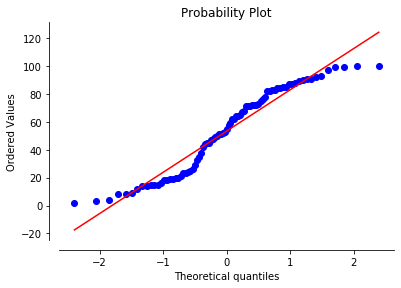

In [22]:
#Script 1.3
#import stats from scipy
from scipy import stats 
import matplotlib.pyplot as plt #a plotting module
import seaborn as sns # an optional module to prettify the plot
fig = plt.figure()
ax = fig.add_subplot(111)
data = read_excel()#upload Chap1.xlsx data
x= data.Defects
stats.probplot(x, plot=ax)
sns.despine(offset=10, trim=False)
plt.show()


In [25]:
#Script 1.4
#modules to import
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2
from numpy import *
from pandas import *
#an example for obtaining the confidence interval of mu when sigma is known
data = read_excel(your directory) #import your sample data from Excel. The column name in Excel is Defects.
data = data.Defects
xbar = data.mean()
sigma = 230#given
alpha = 0.05#given (e.g., alpha = 0.05)
Z = norm.ppf(1-alpha/2.)
N = len(data)#sample number
A = xbar -Z*sigma/sqrt(N)#lower confidence limit
B = xbar +Z*sigma/sqrt(N)#upper confidence limit
print (A, B)


3.8806266181512257 102.84226494811384


In [74]:
#Script 1.5
#import tt_solve_power from statsmodels to run power test one sample t test
from statsmodels.stats.power import tt_solve_power
#https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html
delta = 20#absolute difference given by mu1 - mu0 
sigma = 50 #standard deviation
power = 0.3354
effect_size = delta/sigma
alpha = 0.05
#solve for the sample size, given the power
sample_size = tt_solve_power(effect_size=effect_size, nobs= None, alpha=alpha, power=power, alternative='two-sided')
print (sample_size)
#solve for the power, given the sample size
sample_size = 65
sample_power = tt_solve_power(effect_size=effect_size, nobs= sample_size, alpha=alpha, power=None, alternative='two-sided')
print (sample_power)

16.684320474405997
0.8880425204560722


In [77]:
#Script 1.6
#import modules
from scipy import stats
from statsmodels.stats import weightstats
#https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html
#https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttest_ind.html
#t-test returns (t-statistic, two-tailed p-value)(e.g., observation fewer than 30)
x1 = [12,13,13,14,10,13,13,11,12,14] #array of the first dataset
x2 = [9,14,11,14,9,14,12,11,13,15] #array of the second dataset
equal_var = True#True if equal variances, otherwise False
stats.ttest_ind(x1,x2, equal_var = equal_var)
#Z-test returns (Z-statistic, two-tailed p-value) (e.g., observation more than 30)
weightstats.ztest(x1, x2, alternative= 'two-sided', usevar='pooled', ddof=1.0)

(0.37998029782867504, 0.7039600402810595)

In [80]:
#Script 1.7
#import f from scipy.stats
from scipy.stats import f
alpha = 0.05
var1 = 10 #variance of first variable
var2 = 13 #variance of second variable
df1 = 50 #degrees of freedom first variable
df2 = 61 #degrees of freedom second variable
F0 = var1 /var2 #F-statistic
pvalue = 1-f.cdf(F0, df1, df2) #if p-value < alpha, reject null hypothesis
print (pvalue)

0.8298668194557057


In [81]:
#Script 1.8
#import numpy
import numpy as np
x1 = [12,13,13,14,10,13,13,11,12,14] # first variable
x2 = [9,14,11,14,9,14,12,11,13,15]  # second variable
# print the covariance
print(np.cov(x1, x2)[0][1])
# print the correlation of coefficient
print(np.corrcoef(x1, x2)[0][1])


2.111111111111111
0.773611531106542


In [94]:
#Script 1.9
# import modules
import numpy as np
import statsmodels.api as sm
X = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]] # create a matrix of independent variables
Y = [4, 5, 20, 14, 32, 22, 38, 43]# create an array of the dependent variable
X = sm.add_constant(X)# Add the intercept
model = sm.OLS(Y, X).fit()# fit an ordinary regression model
model.summary()# The summary includes several goodness-of-fit measures


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Wed, 19 Feb 2020   Prob (F-statistic):            0.00713
Time:                        10:54:42   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.268      -5.867      16.912
x1             0.4471      0.285      1.567      0.178      -0.286       1.180
x2             0.2550      0.453      0.563      0.598      -0.910       1.420
==============================================================================
Omnibus:                        0.561   Durbin-Watson:                   3.268
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.534
Skew:                           0.380   Prob(JB):                        0.766
Kurtosis:                       1.987   Cond. No.                         80.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""